# Create a path in reciprocal space

This example shows how to create a k-point path in the reciprocal space by using utilities in `mykit`.

Mainly the `Cell` class in `mykit.core.cell` and `special_kpoints` in `mykit.core.symmetry` will be used.

In [1]:
from mykit.core.cell import Cell
from mykit.core.symmetry import special_kpoints

Suppose we are going to draw the path in the Brillouin zone of a zincblende lattice, $\alpha$-CuCl, for example.

Create a *primitive* zincblende cell of CuCl

In [2]:
cucl = Cell.zincblende("Cu", "Cl", a=5.42, primitive=True)

A `special_kpoints` instance can be created directly from a `Cell` instance

In [3]:
spkpt_cucl = special_kpoints.from_cell(cucl)

Check the available specail kpoints 

In [4]:
spkpt_cucl.spkSym

['GM', 'X', 'L', 'W', 'K']

Now we define a kpath of $\Gamma$-X-L-W-K, and use `convert_kpath` method to generate the coordinates of ends of all line segments

In [5]:
kpathStr = 'GM-X-L-W-K'
kpath = spkpt_cucl.convert_kpath(kpathStr)
kpath

{'symbols': ['GM', 'X', 'X', 'L', 'L', 'W', 'W', 'K'],
 'coordinates': array([[0.   , 0.   , 0.   ],
        [0.5  , 0.   , 0.5  ],
        [0.5  , 0.   , 0.5  ],
        [0.5  , 0.5  , 0.5  ],
        [0.5  , 0.5  , 0.5  ],
        [0.5  , 0.25 , 0.75 ],
        [0.5  , 0.25 , 0.75 ],
        [0.375, 0.375, 0.75 ]])}

draw this path in a 3D plot

In [6]:
%matplotlib notebook
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d.axes3d import Axes3D, get_test_data
import numpy as np

<IPython.core.display.Javascript object>


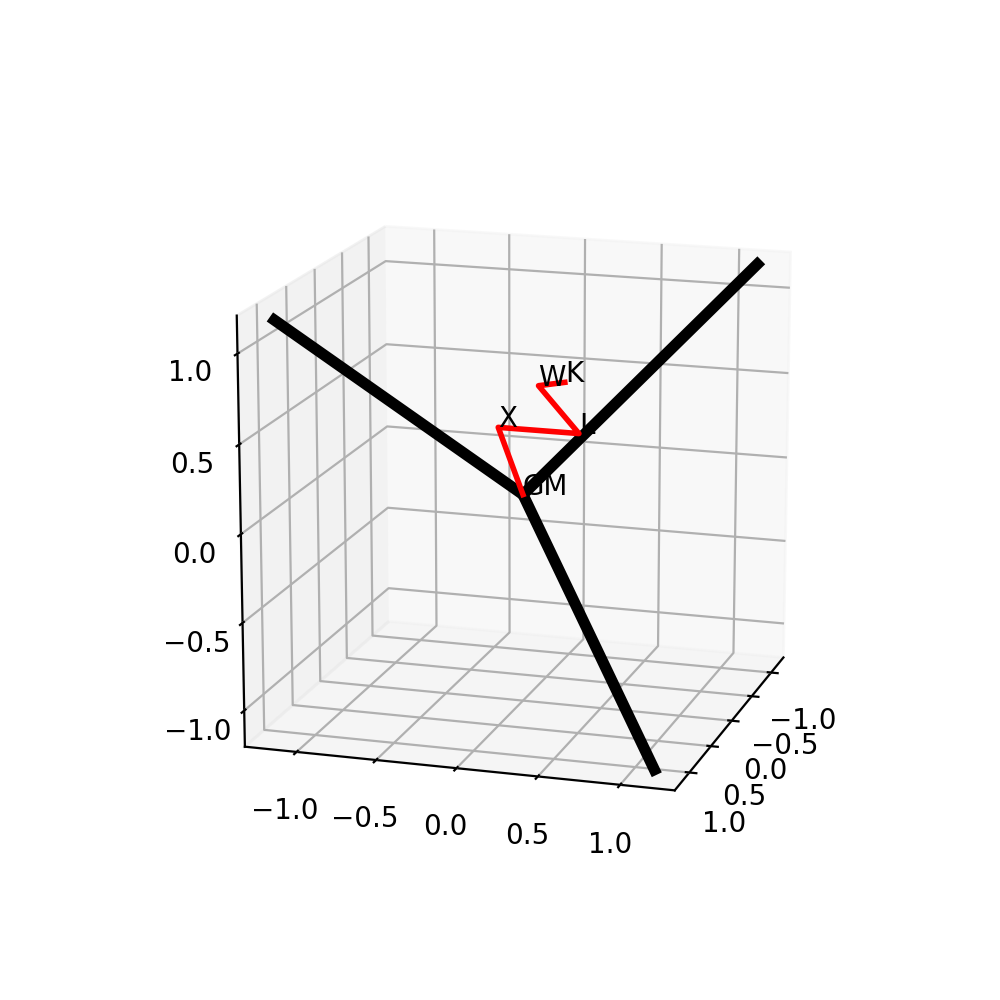

In [10]:
fig = plt.figure(figsize=(5,5))
ax = fig.add_subplot(1,1,1,projection='3d')

# draw  reciprocal lattice vector
b = cucl.b
for _i in range(3):
    a = np.vstack(([0.0,0.0,0.0],b[_i,:]))
    ax.plot(a[:,0], a[:,1], a[:,2], color="black", linewidth=4)

coords = kpath["coordinates"]
syms = kpath["symbols"]
# draw the path
ax.plot(coords[:,0], coords[:,1], coords[:,2], color="red", linewidth=2)
# annotate the symbols
for i, sym in enumerate(syms):
    if sym in syms[:i]:
        continue
    ax.text(*coords[i,:], sym)

It is not obvious since the boundaries of Brillouin zone are not plotted. This feature might be added in the future.